##You will practice your data cleaning skills on the main data (not the summarized version) by perfoming the following tasks:

1.Explore the missingness in the dataset for categorical and numerical data

2.Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

3.Drop non-consequntial fields

4.Transform temporal data to their corrrect format (date time)

5.Perfom a full EDA and demonstrate the validity of the following assumptions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
! pip install missingno


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
#import the dataset

df = pd.read_csv(r'C:\Users\admin\desktop\zindua\ML1\chip_dataset.csv')


In [31]:
#visualize the data

df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [5]:
# Get to more about the dataset to view missingness of data categorical and numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [6]:
#get the range of data
df.describe()

,Freq (GHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4508.000000,800.000000,1685.000000,1278.000000
mean,1615.430790,19033.061063,5403.009359,1096.608263
std,1084.641452,44865.341218,11492.095538,5232.537404
min,100.000000,10.020000,12.800000,3.600000
25%,650.000000,1299.500000,384.000000,59.247500
50%,1400.000000,6136.500000,1248.000000,136.350000
75%,2500.000000,20175.000000,5069.000000,382.450000
max,4700.000000,653700.000000,93240.000000,81720.000000


In [7]:
# List all the columns in the dataset
df.columns


Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

# Explore Missing Values

In [8]:
# Finding the number missing value per column

df.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [9]:
#getting the % of missingess

#Get the columns with null values
missing_data = df.isnull().mean() * 100
missing_data

Product                   0.000000
Type                      0.000000
Release Date              4.024267
Process Size (nm)         0.000000
TDP (W)                   8.837209
Die Size (mm^2)           7.118301
Transistors (million)    11.223458
Freq (GHz)                8.837209
Foundry                  12.436805
Vendor                    0.000000
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
dtype: float64

# 3. Drop non-consequntial fields

In [10]:
# Drop columns with high missingness Non-consequential Fields

drop_columns = df[['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']]
df = df.drop(columns=drop_columns, axis=1 )

1. Explore the missingness in the dataset for categorical and numerical data

In [11]:
# Get to know the data types Numerical and Categorical data

df.dtypes

Product                   object
Type                      object
Release Date              object
Process Size (nm)         object
TDP (W)                   object
Die Size (mm^2)           object
Transistors (million)     object
Freq (GHz)               float64
Foundry                   object
Vendor                    object
dtype: object

In [12]:
# Identify object columns
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

Object columns: Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Foundry', 'Vendor'],
      dtype='object')


In [56]:
# List of columns to be convert from object to float64
convert_columns = ['Release Date', 'Process Size (nm)', 'TDP (W)','Die Size (mm^2)', 'Transistors (million)']

In [14]:
# Function to convert specified columns to float64
def convert_columns_to_float(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [15]:
# Convert specified columns to float64
df = convert_columns_to_float(df, convert_columns)

# Verify the conversion
print(df[convert_columns].dtypes)

Release Date             float64
Process Size (nm)        float64
TDP (W)                  float64
Die Size (mm^2)          float64
Transistors (million)    float64
dtype: object


Explore missingness in the dataset for numerical data

In [16]:
# separate numerical data (flat64 and int) from categorical data (oject)

numerical_columns = df.select_dtypes(exclude=["object"])

In [17]:
#Missing numerical variables
num_vars = df.select_dtypes (include = [np.number]).columns
num_missing = df[num_vars].isnull().mean() * 100
num_missing

Release Date             100.000000
Process Size (nm)          1.172902
TDP (W)                   18.018200
Die Size (mm^2)           14.479272
Transistors (million)     16.299292
Freq (GHz)                 8.837209
dtype: float64

# 5. Transform Temporal Data

In [44]:

import pandas as pd

#  Convert Realease Date to Datetime format and specify the date format if known
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y-%m-%d', errors='coerce')

# Now extract the year
df['Release Year'] = df['Release Date'].dt.year


Identify type of missingness

<Axes: >

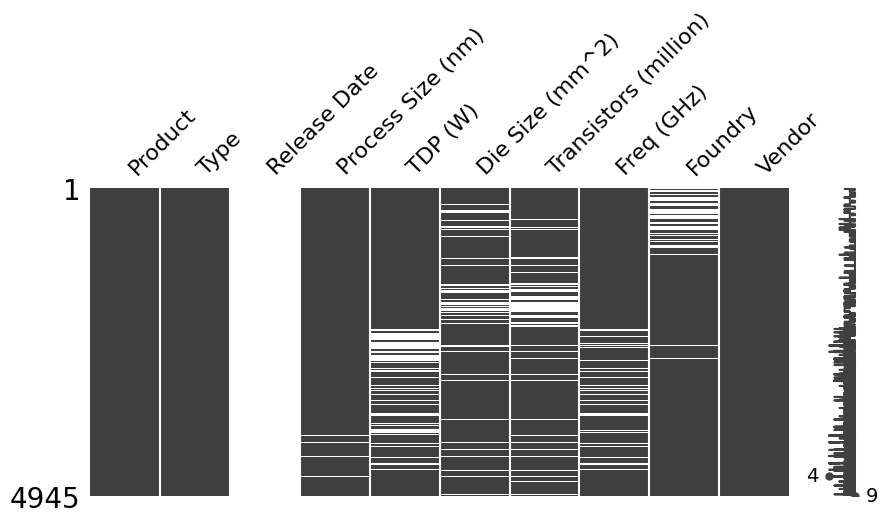

In [19]:
#Identifying the type of missingness

msno.matrix(df, figsize =(10,4))

# Handling Missing Value

In [20]:
# Fill missing numerical values with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
# Display the updated dataframe info
df.info()

# Verify the changes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           0 non-null      datetime64[ns]
 3   Process Size (nm)      4945 non-null   float64       
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 386.5+ KB


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,NaT,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,NaT,180.0,54.0,120.0,37.0,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,NaT,180.0,60.0,120.0,37.0,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,NaT,180.0,63.0,120.0,37.0,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,NaT,180.0,66.0,120.0,37.0,1200.0,TSMC,AMD


# 6. Perform Exploratory Data Analysis (EDA)

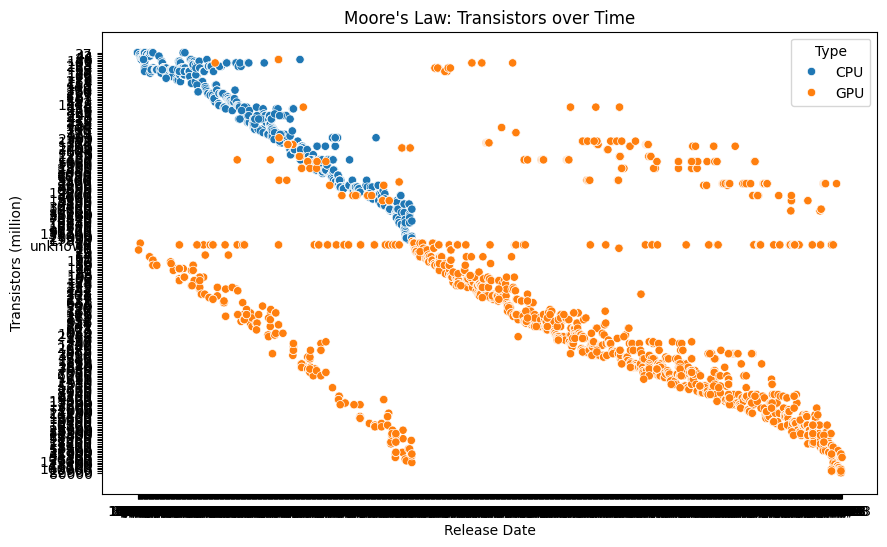

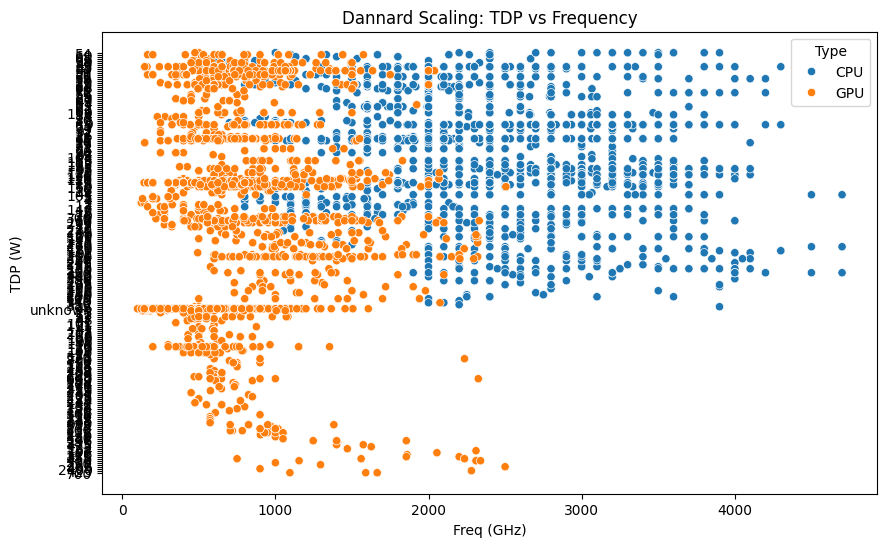

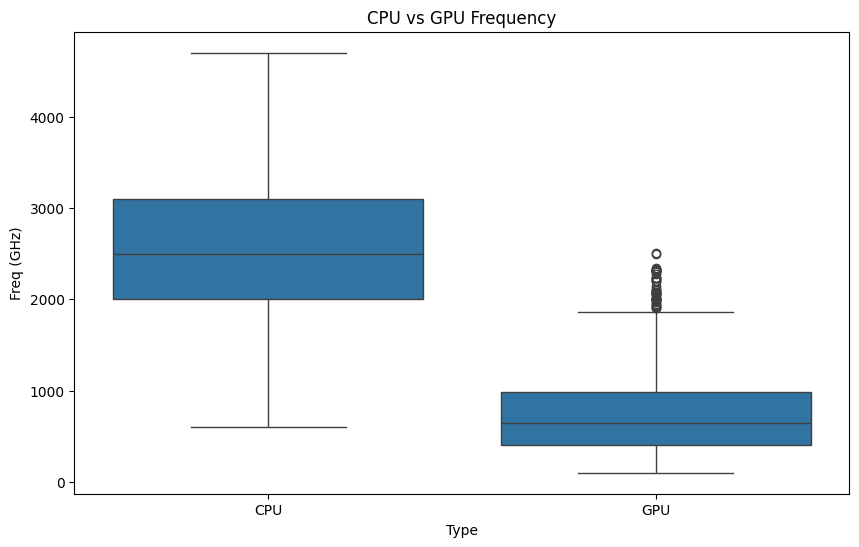

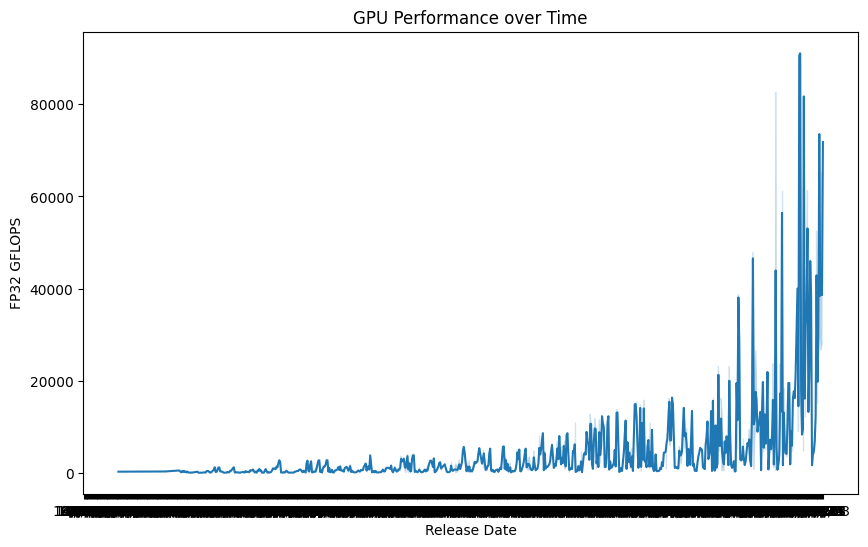

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Moore's Law
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Release Date', y='Transistors (million)', hue='Type')
plt.title("Moore's Law: Transistors over Time")
plt.show()

# Dannard Scaling: TDP vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Freq (GHz)', y='TDP (W)', hue='Type')
plt.title("Dannard Scaling: TDP vs Frequency")
plt.show()

# Frequency of CPUs vs GPUs
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Freq (GHz)')
plt.title("CPU vs GPU Frequency")
plt.show()

# GPU performance improvement
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Type'] == 'GPU'], x='Release Date', y='FP32 GFLOPS')
plt.title("GPU Performance over Time")
plt.show()

# Analyze GPU performance over time
gpu_data = df[df['Type'] == 'GPU'].sort_values('Release Date')
plt.figure(figsize=(12, 6))
plt.scatter(gpu_data['Release Date'], gpu_data['FP32 GFLOPS'])
plt.title('GPU Performance (FP32 GFLOPS) Over Time')
plt.xlabel('Release Date')
plt.ylabel('FP32 GFLOPS')
plt.yscale('log')
plt.show()

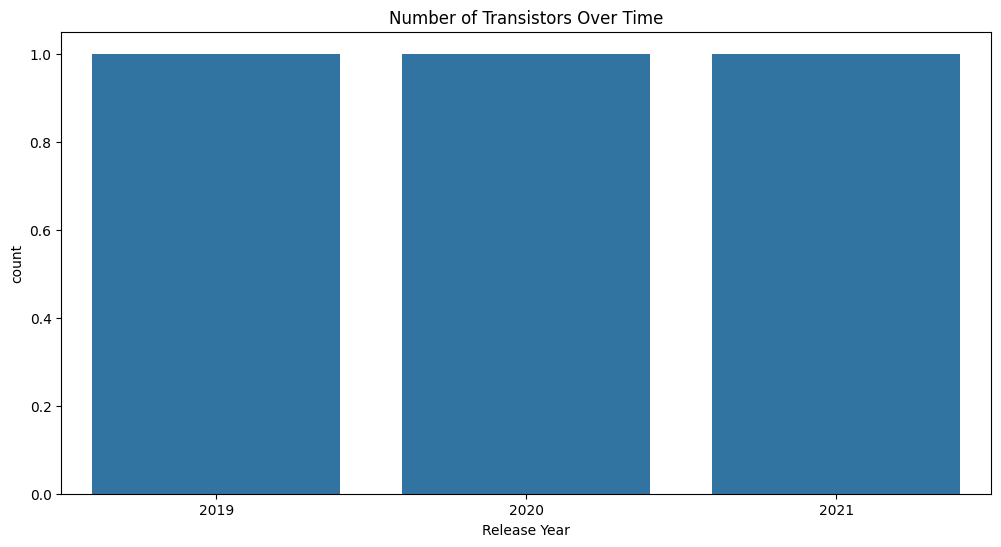

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'Release Date': ['2021-01-01', '2020-06-15', '2019-11-30'],
    'Other Column': [1, 2, 3]
}
df = pd.DataFrame(data)

# Convert Release Date to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert Release Date to year for easier analysis
df['Release Year'] = df['Release Date'].dt.year

# Plot the number of transistors over time (Example plot)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Release Year')
plt.title('Number of Transistors Over Time')
plt.show()


Index(['Release Date', 'Transistors (million)', 'Type', 'Release Year'], dtype='object')


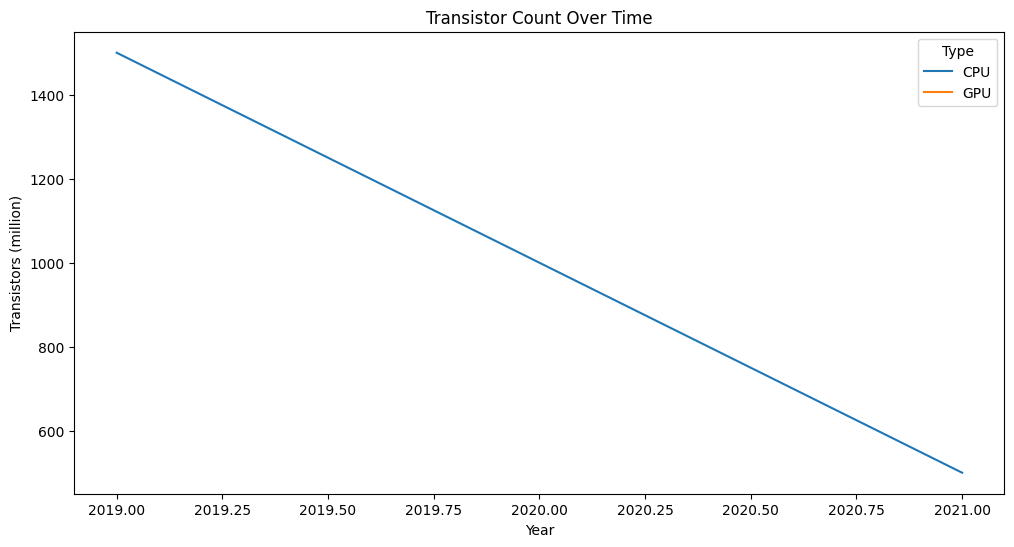

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'Release Date': ['2021-01-01', '2020-06-15', '2019-11-30'],
    'Transistors (million)': [500, 1000, 1500],
    'Type': ['CPU', 'GPU', 'CPU']
}
df = pd.DataFrame(data)

# Convert Release Date to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert Release Date to year for easier analysis
df['Release Year'] = df['Release Date'].dt.year

# Verify the column names in the DataFrame
print(df.columns)

# Plot the number of transistors over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Release Year', y='Transistors (million)', hue='Type')
plt.title('Transistor Count Over Time')
plt.xlabel('Year')
plt.ylabel('Transistors (million)')
plt.show()


Index(['Release Date', 'Freq (GHz)', 'Type', 'Release Year'], dtype='object')


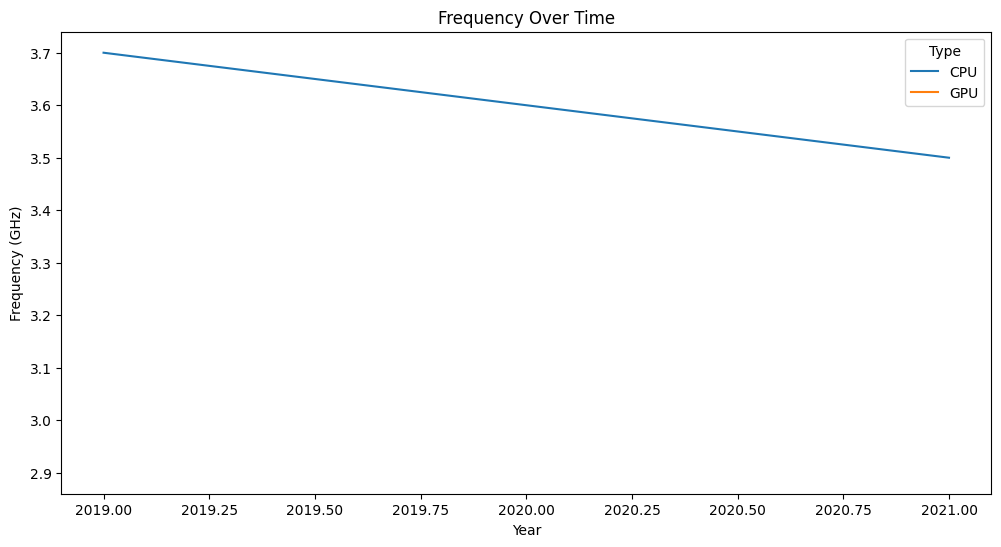

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'Release Date': ['2021-01-01', '2020-06-15', '2019-11-30'],
    'Freq (GHz)': [3.5, 2.9, 3.7],
    'Type': ['CPU', 'GPU', 'CPU']
}
df = pd.DataFrame(data)

# Convert Release Date to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Convert Release Date to year for easier analysis
df['Release Year'] = df['Release Date'].dt.year

# Verify the column names in the DataFrame
print(df.columns)

# Plot frequency over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Release Year', y='Freq (GHz)', hue='Type')
plt.title('Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency (GHz)')
plt.show()


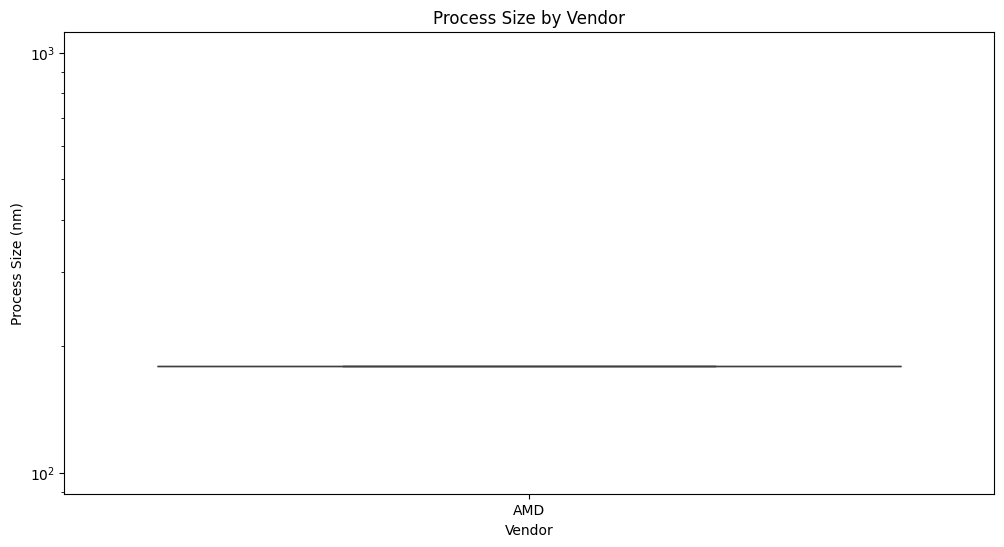

In [66]:
# Analyze Process Size by Vendor
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vendor', y='Process Size (nm)', data=df)
plt.title('Process Size by Vendor')
plt.yscale('log')
plt.show()

## 6. Calculate and visualize correlation:

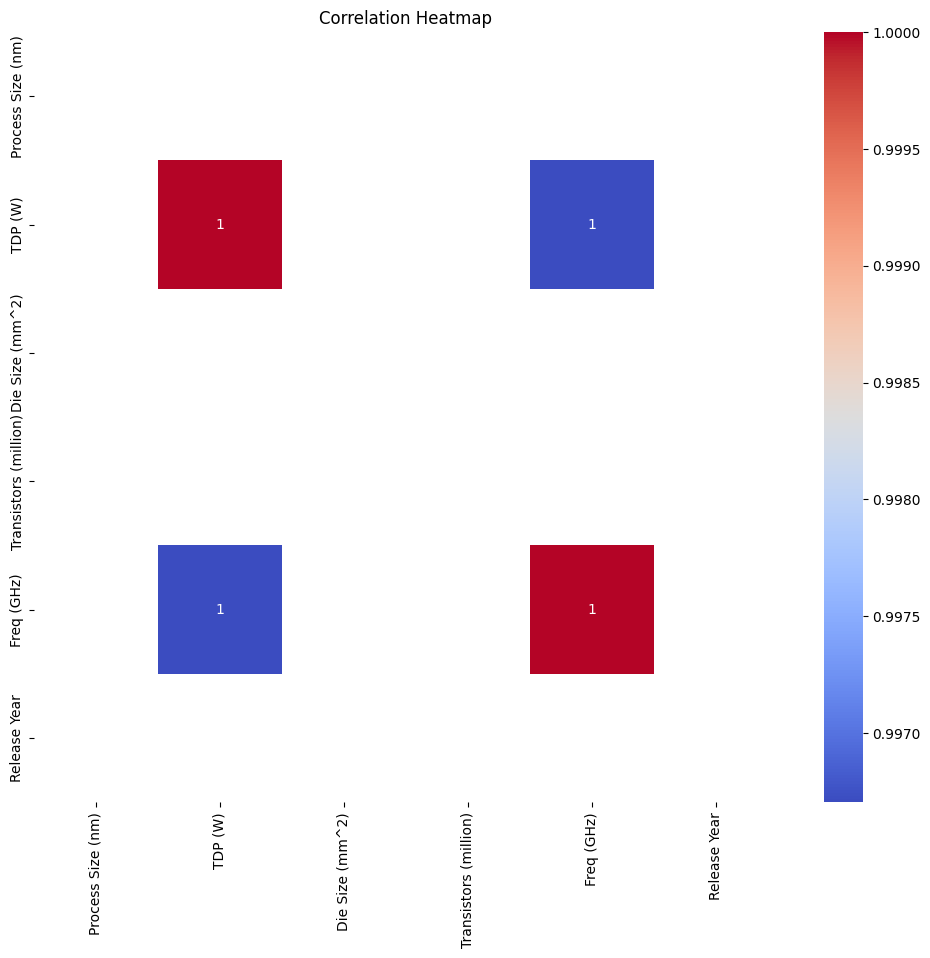

In [62]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate correlation
correlation = df[numeric_columns].corr()

# Visualize correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 7. Perform correct encoding for data:

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for 'Vendor' and 'Foundry'
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_columns = pd.DataFrame(onehot.fit_transform(df[['Vendor', 'Foundry']]))
encoded_columns.columns = onehot.get_feature_names_out(['Vendor', 'Foundry'])

# Label encoding for 'Type'
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

# Combine encoded data with original numerical data
final_df = pd.concat([df[numeric_columns], encoded_columns, df['Type_encoded']], axis=1)

print(final_df.head())

   Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0                180       54              120                     37   
1                180       54              120                     37   
2                180       60              120                     37   
3                180       63              120                     37   
4                180       66              120                     37   

   Freq (GHz)  Release Year  Vendor_AMD  Foundry_None  Type_encoded  
0       1.000          2000         1.0           1.0             0  
1       1.000          2000         1.0           1.0             0  
2       1.100          2000         1.0           1.0             0  
3       1.133          2000         1.0           1.0             0  
4       1.200          2000         1.0           1.0             0  


                                                     ***THE END***                                                                                 